In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [13]:
df = pd.read_excel(r'D:\coolyeah\sem6\pembelajaran mesin\PCOS_data_without_infertility.xlsx')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PCOS (Y/N)              541 non-null    int64  
 1    Age (yrs)              541 non-null    int64  
 2   Weight (Kg)             541 non-null    float64
 3   Height(Cm)              541 non-null    float64
 4   BMI                     242 non-null    float64
 5   Blood Group             541 non-null    int64  
 6   Pulse rate(bpm)         541 non-null    int64  
 7   RR (breaths/min)        541 non-null    int64  
 8   Hb(g/dl)                541 non-null    float64
 9   Cycle(R/I)              541 non-null    int64  
 10  Cycle length(days)      541 non-null    int64  
 11  Marraige Status (Yrs)   540 non-null    float64
 12  Pregnant(Y/N)           541 non-null    int64  
 13  No. of aborptions       541 non-null    int64  
 14    I   beta-HCG(mIU/mL)  541 non-null    fl

In [16]:
df["AMH(ng/mL)"] = pd.to_numeric(df["AMH(ng/mL)"], errors="coerce") #converting object datatype to numeric
df["II    beta-HCG(mIU/mL)"] = pd.to_numeric(df["II    beta-HCG(mIU/mL)"], errors="coerce") #converting object datatypeTonumeric

In [17]:
df = df.rename(columns=lambda x: x.strip()) #trimming column names where there are extra spaces at start and end

In [18]:
df.head()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 42
0,0,28,44.6,152.0,19.3,15,78,22,10.48,2,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,0,36,65.0,161.5,NaN,15,74,20,11.70,2,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,1,33,68.8,165.0,NaN,11,72,18,11.80,2,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,0,37,65.0,148.0,NaN,13,72,20,12.00,2,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,0,25,52.0,161.0,NaN,11,72,18,10.00,2,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [19]:
df.isna().sum()

PCOS (Y/N)                  0
Age (yrs)                   0
Weight (Kg)                 0
Height(Cm)                  0
BMI                       299
Blood Group                 0
Pulse rate(bpm)             0
RR (breaths/min)            0
Hb(g/dl)                    0
Cycle(R/I)                  0
Cycle length(days)          0
Marraige Status (Yrs)       1
Pregnant(Y/N)               0
No. of aborptions           0
I   beta-HCG(mIU/mL)        0
II    beta-HCG(mIU/mL)      1
FSH(mIU/mL)                 0
LH(mIU/mL)                  0
FSH/LH                    532
Hip(inch)                   0
Waist(inch)                 0
Waist:Hip Ratio           532
TSH (mIU/L)                 0
AMH(ng/mL)                  1
PRL(ng/mL)                  0
Vit D3 (ng/mL)              0
PRG(ng/mL)                  0
RBS(mg/dl)                  0
Weight gain(Y/N)            0
hair growth(Y/N)            0
Skin darkening (Y/N)        0
Hair loss(Y/N)              0
Pimples(Y/N)                0
Fast food 

In [20]:
df1 = df.drop(['FSH/LH', 'Waist:Hip Ratio','Unnamed: 42'], axis=1)

In [21]:
df1['BMI'].unique()

array([19.3,  nan, 25.1, 24.7, 24.1, 17.2, 19.7, 21.3, 16.6, 27.2, 22.5,
       19.8, 22. , 27.8, 22.4, 19.1, 23.3, 28.6, 21. , 22.2, 25.3, 24.4,
       27.1, 25.6, 22.8, 23.4, 21.2, 20.4, 22.9, 24.6, 23.6, 19.2, 26.8,
       17.7, 32.8, 34.3, 28.2, 26. , 16. , 24.8, 21.6, 30.9, 23.1, 28.8,
       22.3, 29.5, 18.8, 25.2, 25.7, 28.3, 20.8, 30.1, 29. , 23.5, 26.2,
       29.3, 15.8, 24. , 26.4, 24.3, 28.1, 24.2, 21.5, 18. , 25.9, 25. ,
       17.3, 20. , 21.9, 23.2, 20.3, 27.4, 25.4, 24.5, 27.6, 26.9, 28. ,
       22.1, 32. , 27.9, 24.9, 16.9, 15.1, 33.5, 17.6, 21.1, 22.6, 38.9,
       23.9, 30.8, 16.5, 35.2, 18.2, 19.4, 26.6, 23.7, 25.5, 25.8, 18.3,
       18.1, 26.5, 22.7, 32.5, 26.7, 19.6, 20.5, 30.7, 18.5])

In [22]:
median_bmi = df1['BMI'].median()
median_bmi

24.0

In [23]:
df1['BMI'] = df1['BMI'].fillna(median_bmi)

In [24]:
df1['BMI'].unique()

array([19.3, 24. , 25.1, 24.7, 24.1, 17.2, 19.7, 21.3, 16.6, 27.2, 22.5,
       19.8, 22. , 27.8, 22.4, 19.1, 23.3, 28.6, 21. , 22.2, 25.3, 24.4,
       27.1, 25.6, 22.8, 23.4, 21.2, 20.4, 22.9, 24.6, 23.6, 19.2, 26.8,
       17.7, 32.8, 34.3, 28.2, 26. , 16. , 24.8, 21.6, 30.9, 23.1, 28.8,
       22.3, 29.5, 18.8, 25.2, 25.7, 28.3, 20.8, 30.1, 29. , 23.5, 26.2,
       29.3, 15.8, 26.4, 24.3, 28.1, 24.2, 21.5, 18. , 25.9, 25. , 17.3,
       20. , 21.9, 23.2, 20.3, 27.4, 25.4, 24.5, 27.6, 26.9, 28. , 22.1,
       32. , 27.9, 24.9, 16.9, 15.1, 33.5, 17.6, 21.1, 22.6, 38.9, 23.9,
       30.8, 16.5, 35.2, 18.2, 19.4, 26.6, 23.7, 25.5, 25.8, 18.3, 18.1,
       26.5, 22.7, 32.5, 26.7, 19.6, 20.5, 30.7, 18.5])

In [25]:
df1['Marraige Status (Yrs)'].unique()

array([ 7. , 11. , 10. ,  4. ,  1. ,  8. ,  2. , 13. ,  3. , 15. ,  9. ,
       20. ,  6. , 12. ,  5. ,  3.5, 17. ,  2.5,  1.5, 16. , 18. ,  0. ,
       22. , 19. , 14. ,  4.5, 30. ,  6.5,  8.5, 25. ,  7.5, 24. , 23. ,
        2.2,  nan])

In [33]:
df1.isna().sum()

PCOS (Y/N)                0
Age (yrs)                 0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     1
Pregnant(Y/N)             0
No. of aborptions         0
I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)    1
FSH(mIU/mL)               0
LH(mIU/mL)                0
Hip(inch)                 0
Waist(inch)               0
TSH (mIU/L)               0
AMH(ng/mL)                1
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)           1
Reg.Exercise(Y/N)         0
BP _Systolic (mmHg)       0
BP _Diastolic (mmHg)      0
Follicle No. (L)    

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PCOS (Y/N)              541 non-null    int64  
 1   Age (yrs)               541 non-null    int64  
 2   Weight (Kg)             541 non-null    float64
 3   Height(Cm)              541 non-null    float64
 4   BMI                     541 non-null    float64
 5   Blood Group             541 non-null    int64  
 6   Pulse rate(bpm)         541 non-null    int64  
 7   RR (breaths/min)        541 non-null    int64  
 8   Hb(g/dl)                541 non-null    float64
 9   Cycle(R/I)              541 non-null    int64  
 10  Cycle length(days)      541 non-null    int64  
 11  Marraige Status (Yrs)   540 non-null    float64
 12  Pregnant(Y/N)           541 non-null    int64  
 13  No. of aborptions       541 non-null    int64  
 14  I   beta-HCG(mIU/mL)    541 non-null    fl

In [35]:
df2 = df1.dropna(axis=0)

In [37]:
df2.isna().sum()

PCOS (Y/N)                0
Age (yrs)                 0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     0
Pregnant(Y/N)             0
No. of aborptions         0
I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
Hip(inch)                 0
Waist(inch)               0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)           0
Reg.Exercise(Y/N)         0
BP _Systolic (mmHg)       0
BP _Diastolic (mmHg)      0
Follicle No. (L)    

In [38]:
X = df2.iloc[:,1:39]
y = df2.iloc[:,0]
y.value_counts()

0    362
1    175
Name: PCOS (Y/N), dtype: int64

In [39]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeature = SelectKBest(score_func=chi2, k=5)
fit = bestfeature.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores], axis=1)
featureScores.columns = ['X', 'Score']
print(featureScores.nlargest(10,'Score'))

                         X        Score
22          Vit D3 (ng/mL)  9600.594045
13    I   beta-HCG(mIU/mL)  6899.358709
16              LH(mIU/mL)  2572.753526
15             FSH(mIU/mL)  1592.273459
14  II    beta-HCG(mIU/mL)  1012.628577
35        Follicle No. (R)   673.143812
34        Follicle No. (L)   564.595226
20              AMH(ng/mL)   221.815736
27    Skin darkening (Y/N)    85.664994
26        hair growth(Y/N)    84.038102


In [40]:
df3 = df2.drop(['Pulse rate(bpm)', 'RR (breaths/min)','Pregnant(Y/N)','No. of aborptions','I   beta-HCG(mIU/mL)','II    beta-HCG(mIU/mL)','TSH (mIU/L)','PRL(ng/mL)','BP _Systolic (mmHg)','BP _Diastolic (mmHg)'], axis=1)

In [41]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537 entries, 0 to 540
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PCOS (Y/N)             537 non-null    int64  
 1   Age (yrs)              537 non-null    int64  
 2   Weight (Kg)            537 non-null    float64
 3   Height(Cm)             537 non-null    float64
 4   BMI                    537 non-null    float64
 5   Blood Group            537 non-null    int64  
 6   Hb(g/dl)               537 non-null    float64
 7   Cycle(R/I)             537 non-null    int64  
 8   Cycle length(days)     537 non-null    int64  
 9   Marraige Status (Yrs)  537 non-null    float64
 10  FSH(mIU/mL)            537 non-null    float64
 11  LH(mIU/mL)             537 non-null    float64
 12  Hip(inch)              537 non-null    int64  
 13  Waist(inch)            537 non-null    int64  
 14  AMH(ng/mL)             537 non-null    float64
 15  Vit D3

In [43]:
X = df3.iloc[:, 1:]
y = df3.iloc[:, 0]

In [44]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [45]:
# Create an instance of the Logistic Regression model
logreg = LogisticRegression()

In [46]:
# Fit the model on the training data
logreg.fit(X_train, y_train)

C:\Users\HP\kuliah_machinelearning\project_pertama\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
y_pred = logreg.predict(X_test)

In [48]:
print("Accuracy:", logreg.score(X_test, y_test))

Accuracy: 0.8950617283950617


In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       108
           1       0.85      0.83      0.84        54

    accuracy                           0.90       162
   macro avg       0.88      0.88      0.88       162
weighted avg       0.89      0.90      0.89       162



Dari pemodelan menggunakan logistic regression dengan 29 features yang ditentukan oleh tim, di dapatkan akurasi 90%

In [57]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

print('ROC AUC score: ', roc_auc_score(y_test, y_pred))
roc.append(roc_auc_score(y_test, y_pred))

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

ROC AUC score:  0.8796296296296298


NameError: name 'roc' is not defined

In [55]:
A = df2.iloc[:,1:39]
b = df2.iloc[:,0]
b.value_counts()

0    362
1    175
Name: PCOS (Y/N), dtype: int64

[0.01687088 0.01537332 0.01344939 0.01315327 0.01047231 0.01279839
 0.01134122 0.01184012 0.04899759 0.02484242 0.01465146 0.00734894
 0.00867298 0.01313135 0.00932857 0.01147365 0.01603715 0.01828157
 0.01481432 0.01224043 0.02140903 0.01220596 0.01189856 0.01149128
 0.01363803 0.06865525 0.07435303 0.10736165 0.01494077 0.02763252
 0.04387627 0.01393239 0.0124145  0.00859089 0.08758536 0.13468105
 0.01485633 0.01535781]


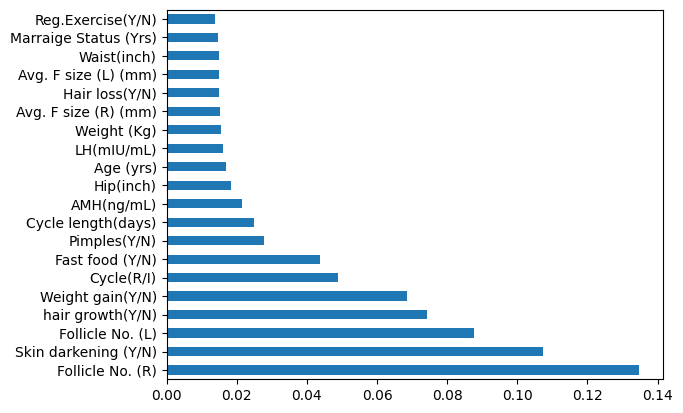

In [52]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(A,b)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=A.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.rcParams["figure.figsize"] = (20,20)
plt.show()

In [58]:
df4 = df2.drop(['Pulse rate(bpm)', 'RR (breaths/min)','Hb(g/dl)','Pregnant(Y/N)','No. of aborptions','Height(Cm)','II    beta-HCG(mIU/mL)','FSH(mIU/mL)','TSH (mIU/L)','PRL(ng/mL)','Vit D3 (ng/mL)','Hair loss(Y/N)','BP _Systolic (mmHg)','BP _Diastolic (mmHg)','Endometrium (mm)','PRG(ng/mL)','RBS(mg/dl)'], axis=1)

In [59]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537 entries, 0 to 540
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PCOS (Y/N)             537 non-null    int64  
 1   Age (yrs)              537 non-null    int64  
 2   Weight (Kg)            537 non-null    float64
 3   BMI                    537 non-null    float64
 4   Blood Group            537 non-null    int64  
 5   Cycle(R/I)             537 non-null    int64  
 6   Cycle length(days)     537 non-null    int64  
 7   Marraige Status (Yrs)  537 non-null    float64
 8   I   beta-HCG(mIU/mL)   537 non-null    float64
 9   LH(mIU/mL)             537 non-null    float64
 10  Hip(inch)              537 non-null    int64  
 11  Waist(inch)            537 non-null    int64  
 12  AMH(ng/mL)             537 non-null    float64
 13  Weight gain(Y/N)       537 non-null    int64  
 14  hair growth(Y/N)       537 non-null    int64  
 15  Skin d

In [60]:
d = df4.iloc[:, 0]
C = df4.iloc[:, 1:]

In [61]:
# Split the dataset into training and testing sets
C_train, C_test, d_train, d_test = train_test_split(C, d, test_size=0.3, random_state=0)


In [62]:
logreg.fit(C_train, d_train)

C:\Users\HP\kuliah_machinelearning\project_pertama\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

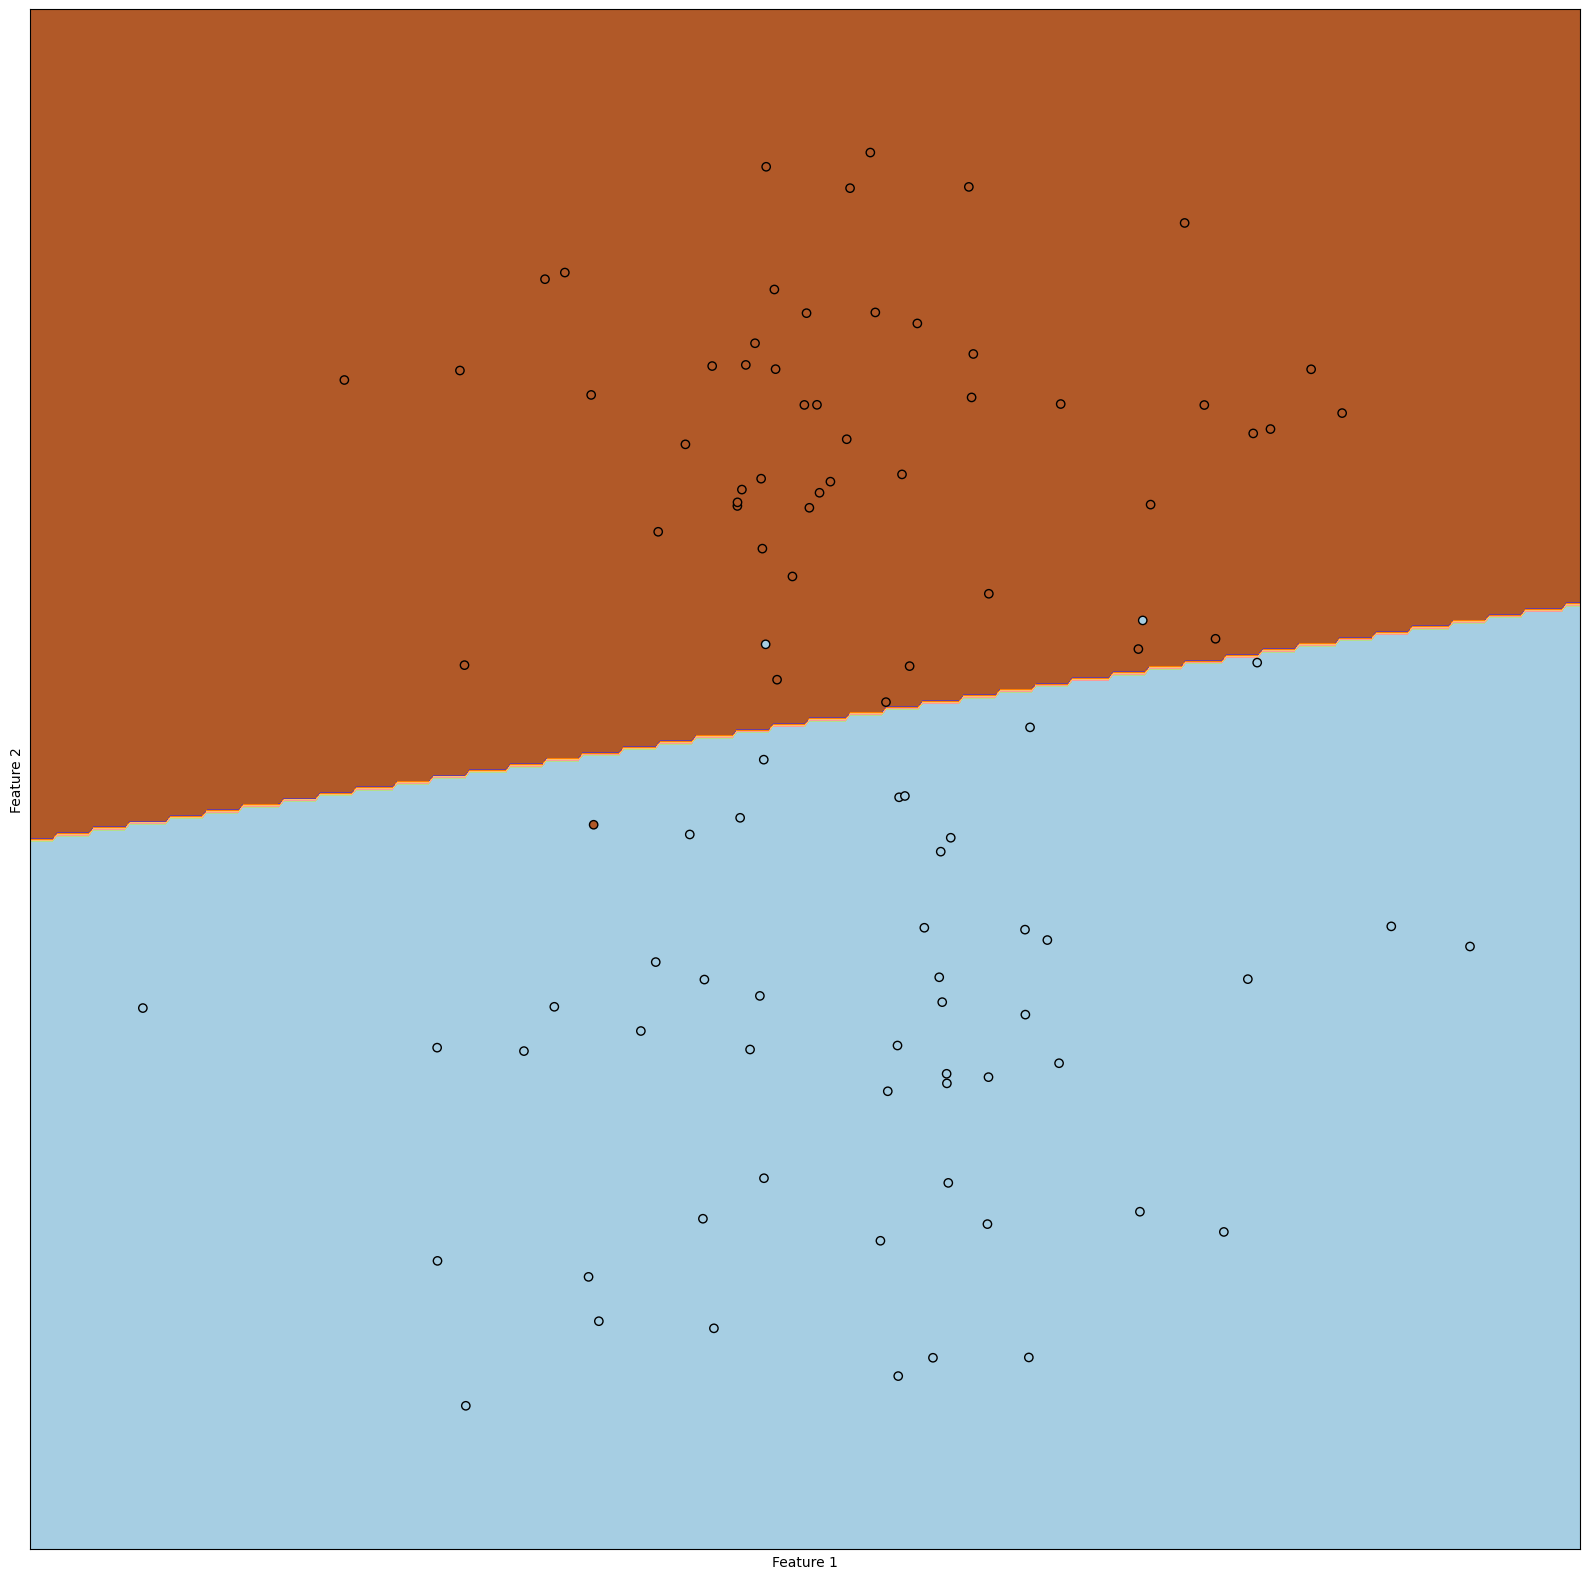

In [63]:
# Generate random data
C, d = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=14)

# Fit logistic regression model
clf = LogisticRegression(random_state=0).fit(C, d)

# Define meshgrid for plotting decision boundary
h = 0.02
x_min, x_max = C[:, 0].min() - .5, C[:, 0].max() + .5
y_min, y_max = C[:, 1].min() - .5, C[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict class for each point in meshgrid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and scatter plot of data points
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(C[:, 0], C[:, 1], c=d, edgecolors='k', cmap=plt.cm.Paired)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()